## Plots for the H2AMI 

In [4]:
import bagpy
import pandas as pd
import numpy as np
from bagpy import bagreader

def load_bag_file(file_path):
    try:
        # Load the bag file
        bag = bagreader(file_path)
        print(f"Bag loaded successfully: {file_path}")
        return bag
    except Exception as e:
        print(f"Failed to load bag file: {e}")
        return None

def get_pandas_by_topic(file_path, topic_list): 
    bag = load_bag_file(file_path)
    pds = {} 
    for topic in topic_list: 
        pds["{}".format(topic)] = pd.read_csv(bag.message_by_topic(topic))
    return pds



[INFO]  Successfully created the data folder ./bags/h2ami_bags/first_meas_op.
Bag loaded successfully: ./bags/h2ami_bags/first_meas_op.bag


In [86]:
bag_pth = './bags/h2ami_bags/first_meas_op.bag'
b_ = load_bag_file(bag_pth)
pd_ = get_pandas_by_topic(bag_pth, [t for t in b_.topic_table['Topics']])

[INFO]  Data folder ./bags/h2ami_bags/first_meas_op already exists. Not creating.
Bag loaded successfully: ./bags/h2ami_bags/first_meas_op.bag
[INFO]  Data folder ./bags/h2ami_bags/first_meas_op already exists. Not creating.
Bag loaded successfully: ./bags/h2ami_bags/first_meas_op.bag
                          Topics  \
0  /control_arm/delta_twist_cmds   
1          /hpe3d/openpose_hpe3d   
2                      /red/pose   
3  /red/position_hold/trajectory   
4                  /uav/test_ref   

                                          Types  Message Count  Frequency  
0                    geometry_msgs/TwistStamped          20373      500.0  
1                      hpe_ros_msgs/HumanPose3D           1985       25.0  
2                     geometry_msgs/PoseStamped           3969       50.0  
3  trajectory_msgs/MultiDOFJointTrajectoryPoint          20371      500.0  
4                         geometry_msgs/Vector3          20372      500.0  


In [87]:
print(b_.topic_table)

                          Topics  \
0  /control_arm/delta_twist_cmds   
1          /hpe3d/openpose_hpe3d   
2                      /red/pose   
3  /red/position_hold/trajectory   
4                  /uav/test_ref   

                                          Types  Message Count  Frequency  
0                    geometry_msgs/TwistStamped          20373      500.0  
1                      hpe_ros_msgs/HumanPose3D           1985       25.0  
2                     geometry_msgs/PoseStamped           3969       50.0  
3  trajectory_msgs/MultiDOFJointTrajectoryPoint          20371      500.0  
4                         geometry_msgs/Vector3          20372      500.0  


In [70]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})


In [71]:
b_cmd = pd_['/control_arm/delta_twist_cmds']
t = b_cmd['Time']
v = np.array([b_cmd['twist.linear.x'], b_cmd['twist.linear.y'], b_cmd['twist.linear.z']])

In [84]:
def plot_ee_vel(ax, t, v):
    f = plt.figure(figsize=(10, 5))

    # Google shades of RGB
    colors = ['#DB4437', '#0F9D58', '#4285F4']

    plt.plot(t, v[0], label=r'$x$', color=colors[0])
    plt.plot(t, v[1], label=r'$y$', color=colors[1])
    plt.plot(t, v[2], label=r'$z$', color=colors[2])

    plt.xlabel(r'$t \ [s]$')
    plt.ylabel(r'$m/s$')

    plt.xlim(min(t), max(t))

    plt.legend()
    plt.grid(True, which='major', linestyle='--', alpha=0.7)
    plt.grid(True, which='minor', linestyle=':', alpha=0.5)
    
    plt.title('End-Effector Velocity Over Time')

    plt.show()



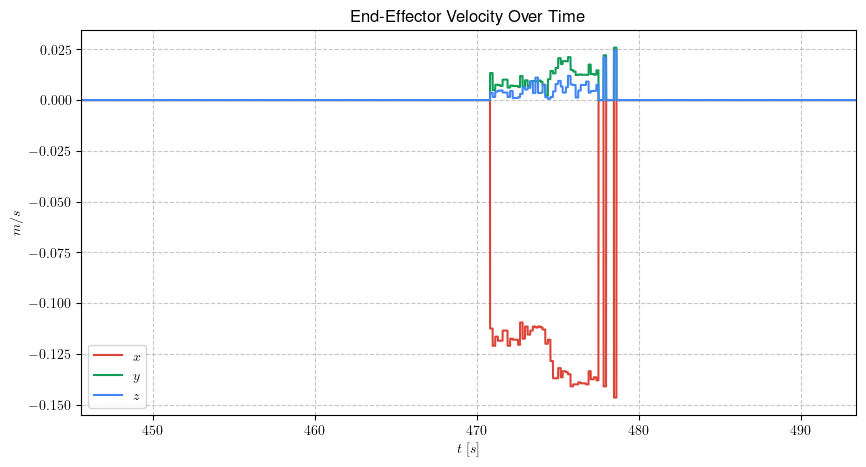

In [85]:
plot_ee_vel(t, v)